In [17]:
# --------------------------
# 1. Simple 1D Grid Environment
# --------------------------
class SimpleGridEnv:
    def __init__(self, size=5):
        self.size = size
        self.state = 0
        self.goal = size - 1

    def reset(self):
        self.state = 0
        return self.state

    def step(self, action):
        # Move agent
        if action == 0:  # left
            self.state = max(0, self.state - 1)
        elif action == 1:  # right
            self.state = min(self.size - 1, self.state + 1)

        # Check reward
        if self.state == self.goal:
            return self.state, 1, True  # next_state, reward, done
        else:
            return self.state, 0, False

In [18]:
# --------------------------
# 2. Q-Learning Agent
# --------------------------
class QLearningAgent:
    def __init__(self, state_size, action_size, lr=0.1, gamma=0.9, epsilon=0.2):
        self.q_table = np.zeros((state_size, action_size))
        self.lr = lr
        self.gamma = gamma
        self.epsilon = epsilon
        self.action_size = action_size

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.action_size)  # explore
        return np.argmax(self.q_table[state])  # exploit

    def learn(self, state, action, reward, next_state):
        predict = self.q_table[state, action]
        target = reward + self.gamma * np.max(self.q_table[next_state])
        self.q_table[state, action] += self.lr * (target - predict)

In [19]:
# --------------------------
# 3. Training
# --------------------------
env = SimpleGridEnv(size=5)
agent = QLearningAgent(state_size=5, action_size=2)

episodes = 100

for ep in range(episodes):
    state = env.reset()
    done = False
    while not done:
        action = agent.choose_action(state)
        next_state, reward, done = env.step(action)
        agent.learn(state, action, reward, next_state)
        state = next_state

print("Trained Q-table:")
print(agent.q_table)


Trained Q-table:
[[0.13071041 0.72585659]
 [0.30154466 0.80898229]
 [0.34555594 0.89979034]
 [0.43083346 0.99997344]
 [0.         0.        ]]


In [20]:
# --------------------------
# 4. Evaluation
# --------------------------
agent.epsilon = 0  # no exploration during evaluation

eval_episodes = 5
total_steps = []

for ep in range(eval_episodes):
    state = env.reset()
    done = False
    steps = 0
    path = [state]

    while not done:
        action = agent.choose_action(state)
        next_state, reward, done = env.step(action)
        state = next_state
        path.append(state)
        steps += 1

    total_steps.append(steps)
    print(f"Episode {ep+1}: reached goal in {steps} steps. Path: {path}")

# Average steps
avg_steps = np.mean(total_steps)
print(f"\nAverage steps to reach goal over {eval_episodes} episodes: {avg_steps}")

Episode 1: reached goal in 4 steps. Path: [0, 1, 2, 3, 4]
Episode 2: reached goal in 4 steps. Path: [0, 1, 2, 3, 4]
Episode 3: reached goal in 4 steps. Path: [0, 1, 2, 3, 4]
Episode 4: reached goal in 4 steps. Path: [0, 1, 2, 3, 4]
Episode 5: reached goal in 4 steps. Path: [0, 1, 2, 3, 4]

Average steps to reach goal over 5 episodes: 4.0


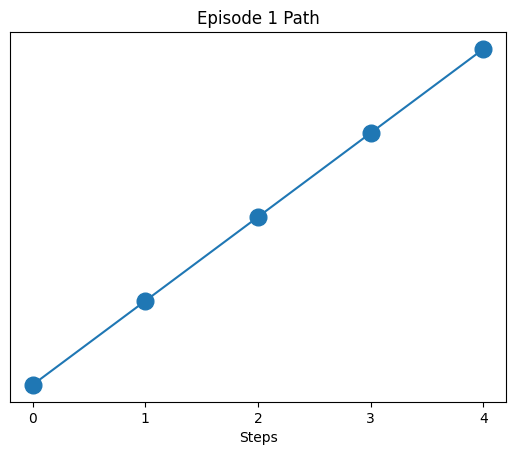

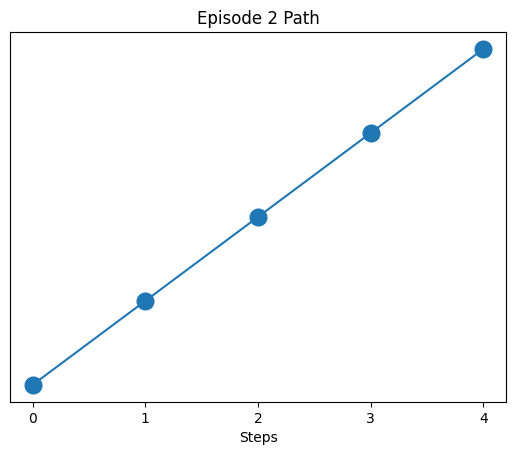

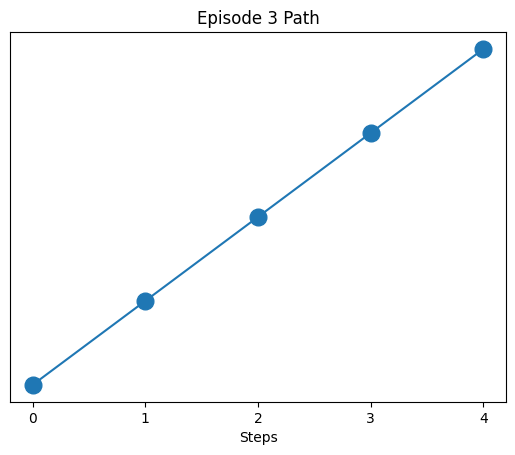

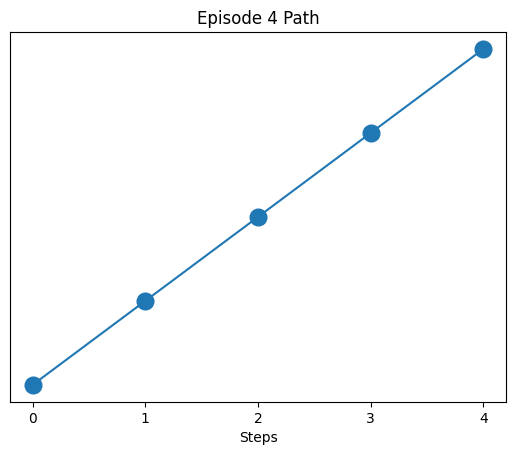

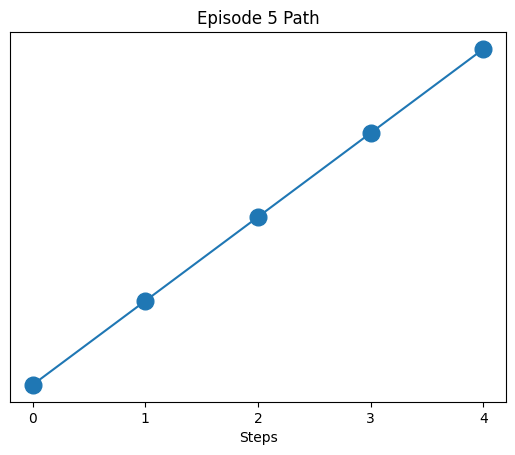

In [21]:
# --------------------------
# 5. Visualize Agent's Path
# --------------------------
for ep in range(eval_episodes):
    state = env.reset()
    done = False
    path = [state]
    while not done:
        action = agent.choose_action(state)
        state, _, done = env.step(action)
        path.append(state)

    plt.figure()
    plt.plot(path, 'o-', markersize=12)
    plt.xticks(range(env.size))
    plt.yticks([])
    plt.title(f"Episode {ep+1} Path")
    plt.xlabel("Steps")
    plt.show()